##### 생선의 무개와 크기로 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 ==> 분류 
- 학습 알고리즘(문제해결방법) : 최근접이웃알고리즘

[1]데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
DATA_FILE='../data/fish.csv'
## - usecols로  사용할 만큼 불러오기 : Species, Weight, Length OR  0, 1, 2
fishDF=pd.read_csv(DATA_FILE,usecols=(0,1,2))
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [2]:
mask=(fishDF['Species']=='Bream')|(fishDF['Species']=='Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True,inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [3]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_11704\3608636985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})


In [4]:
twoDF.head()

,Species,Weight,Length,S_code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


[2] 피쳐와 타겟 분리

In [5]:
features=twoDF[['Weight','Length']]
target=twoDF['S_code']

print(f'features.shape : {features.shape}, {features.ndim}D')
print(f'target.shape : {target.shape},{target.ndim}D')

features.shape : (49, 2), 2D
target.shape : (49,),1D


[3] 데이터셋준비 => 학습용,테스트용

In [6]:
from sklearn.model_selection import train_test_split

#train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,stratify=target,random_state=10)

In [7]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'Y_train : {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (39, 2), 2D
Y_train : (39,), 1D
X_test : (10, 2), 2D
Y_test : (10,), 1D


In [8]:
# target 0,1의 비율
print(Y_train.value_counts()[0]/Y_train.shape[0],Y_train.value_counts()[1]/Y_train.shape[0])
print(Y_test.value_counts()[0]/Y_test.shape[0],Y_test.value_counts()[1]/Y_test.shape[0])

0.717948717948718 0.28205128205128205
0.7 0.3


[4] 훈련/학습 진행 
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 학습인스턴스 생성
model=KNeighborsClassifier()

In [13]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [14]:
model.classes_,model.feature_names_in_,model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [15]:
model.score(X_test,Y_test)

1.0

[6] 예측 하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [20]:
new_data=pd.DataFrame([[413,27.8]],columns=model.feature_names_in_)
model.predict(new_data)

array([0], dtype=int64)

In [22]:
### 최근접한 kro 데이터 찾기
distance,index=model.kneighbors(new_data)
distance

array([[17.04230031, 23.10497782, 37.04875167, 37.0653477 , 50.01439793]])

In [24]:
idx=index.reshape(-1).tolist()

In [25]:
twoDF.loc[idx]

,Species,Weight,Length,S_code
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


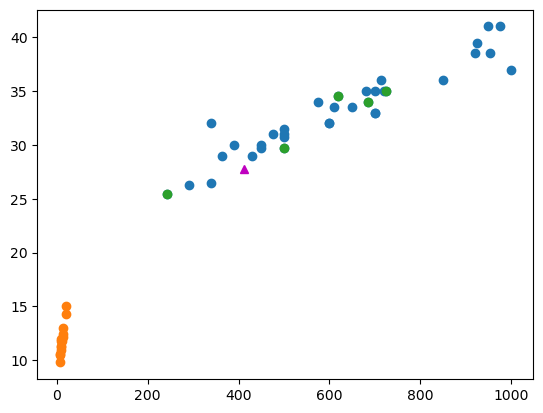

In [31]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개의 피쳐(Weight,Lenght)로 종 분류 가능
plt.scatter(twoDF.loc[:34,'Weight'],twoDF.loc[:34,'Length'])
plt.scatter(twoDF.loc[35:,'Weight'],twoDF.loc[35:,'Length'])
plt.scatter(twoDF.iloc[idx]['Weight'],twoDF.iloc[idx]['Length'])
plt.plot(new_data['Weight'],new_data['Length'],'m^')
plt.show()